<a href="https://colab.research.google.com/github/sivajilucky/NDVI/blob/main/HandWritten_Letter_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np


In [4]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

In [5]:
len(x_train)

60000

In [7]:
x_train[0].shape

(28, 28)

In [8]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

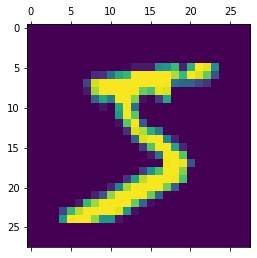

In [9]:
plt.matshow(x_train[0])

In [10]:
y_train[0]

5

Here you are doing the Scaling

In [19]:
x_train=x_train/255
x_test=x_test/255

In [20]:
x_train_flatten=x_train.reshape(len(x_train),28*28)
x_test_flatten=x_test.reshape(len(x_test),28*28)
x_train_flatten.shape

(60000, 784)

In [58]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train_flatten, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4728 - accuracy: 0.8764
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3050 - accuracy: 0.9147
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2833 - accuracy: 0.9209
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2734 - accuracy: 0.9239
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2665 - accuracy: 0.9258


In [23]:
model.evaluate(x_test_flatten,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2669 - accuracy: 0.9267


[0.2668529450893402, 0.9266999959945679]

In [26]:
model.predict(x_test_flatten)

array([[3.0914485e-02, 2.8131259e-07, 5.3039998e-02, ..., 9.9984753e-01,
        1.3838521e-01, 6.4736974e-01],
       [4.7025293e-01, 4.6847463e-03, 9.9922824e-01, ..., 1.0856342e-12,
        1.5366238e-01, 4.0781547e-09],
       [4.7838688e-04, 9.9396777e-01, 6.4299566e-01, ..., 1.4193138e-01,
        3.9652318e-01, 5.3764760e-02],
       ...,
       [3.8891303e-06, 2.7793594e-06, 8.6730719e-04, ..., 2.7162865e-01,
        6.2833887e-01, 8.1064123e-01],
       [1.2353063e-04, 1.8599629e-04, 1.4284253e-04, ..., 4.4512944e-05,
        7.0042080e-01, 1.5828013e-04],
       [1.5767872e-02, 3.3351322e-10, 1.8860364e-01, ..., 2.6282992e-08,
        2.5507808e-04, 1.0668134e-06]], dtype=float32)

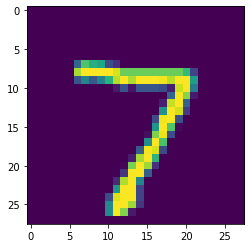

In [27]:
plt.imshow(x_test[0])

In [29]:
y_predict=model.predict(x_test_flatten)
y_predict[0]

array([3.0914485e-02, 2.8131259e-07, 5.3039998e-02, 9.5504171e-01,
       2.7505755e-03, 9.7100556e-02, 1.3078054e-06, 9.9984753e-01,
       1.3838521e-01, 6.4736974e-01], dtype=float32)

In [32]:
np.argmax(y_predict[0])

7

In [33]:
y_predict_labels=[np.argmax(i) for i in y_predict]

In [34]:
y_predict_labels[:5]

[7, 2, 1, 0, 4]

In [35]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [39]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predict_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 965,    0,    1,    2,    0,    4,    4,    3,    1,    0],
       [   0, 1112,    3,    2,    0,    1,    4,    2,   11,    0],
       [   9,    9,  919,   16,    8,    3,   13,   10,   41,    4],
       [   4,    0,   19,  911,    1,   28,    2,   10,   26,    9],
       [   1,    1,    4,    1,  920,    0,    9,    3,    9,   34],
       [  10,    3,    3,   29,    9,  776,   13,    7,   34,    8],
       [  11,    3,    6,    1,    8,   13,  912,    2,    2,    0],
       [   1,    5,   22,    6,    9,    0,    0,  949,    3,   33],
       [   6,    7,    6,   15,    9,   21,    9,   11,  883,    7],
       [  11,    7,    1,    8,   29,    6,    0,   19,    8,  920]],
      dtype=int32)>

Text(69.0, 0.5, 'truth')

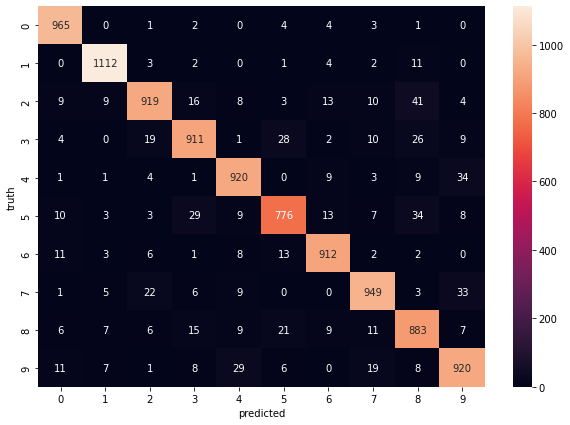

In [43]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('predicted')
plt.ylabel('truth')

In [46]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train_flatten, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2761 - accuracy: 0.9205
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1236 - accuracy: 0.9634
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0874 - accuracy: 0.9737
Epoch 4/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0674 - accuracy: 0.9794
Epoch 5/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0534 - accuracy: 0.9835


In [48]:
model.evaluate(x_test_flatten,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0867 - accuracy: 0.9727


[0.08667413145303726, 0.9726999998092651]

Text(69.0, 0.5, 'Truth')

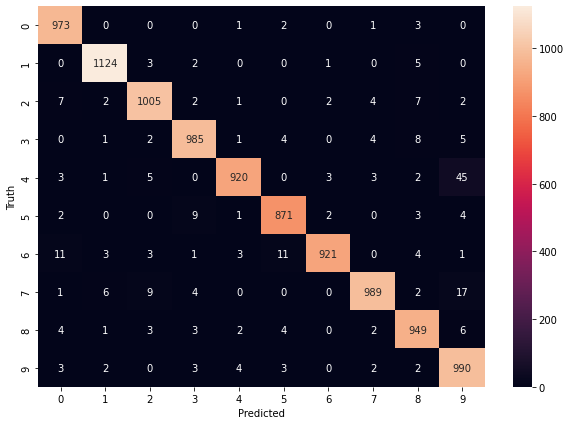

In [49]:
y_predicted = model.predict(x_test_flatten)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Using Flatten layer so that we don't have to call .reshape on input dataset


In [51]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2728 - accuracy: 0.9218
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1275 - accuracy: 0.9624
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0887 - accuracy: 0.9733
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0662 - accuracy: 0.9796
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0534 - accuracy: 0.9837
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0425 - accuracy: 0.9866
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0346 - accuracy: 0.9890
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0295 - accuracy: 0.9907
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0233 - accuracy: 0.9930
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.020

In [53]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0851 - accuracy: 0.9776


[0.08513474464416504, 0.9775999784469604]